## <span style="color:#ff5f27"> 📝 Imports

In [165]:
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('int20h-ds-test-dataset.csv')

print(f"⛳️ The shape of df: {df.shape}")
df.head()

⛳️ The shape of df: (23357, 8)


,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


# <span style="color:#ff5f27"> 👨🏻‍🎨 Data Exploration

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              23357 non-null  object
 1   user_state          23286 non-null  object
 2   event_name          23357 non-null  object
 3   event_attributes    23357 non-null  object
 4   event_created_date  23357 non-null  object
 5   event_platform      23357 non-null  object
 6   device_manufacture  15847 non-null  object
 7   device_model        15847 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


### Lets find out how many NaNs we have.

NUMBER OF NULL VALUES PER COLUMN:


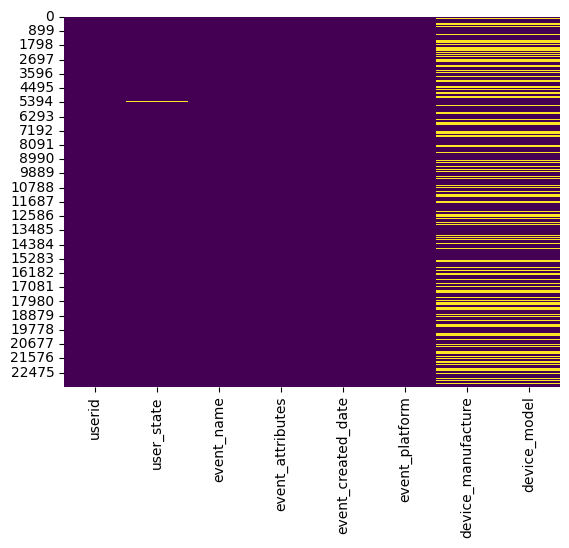

userid                   0
user_state              71
event_name               0
event_attributes         0
event_created_date       0
event_platform           0
device_manufacture    7510
device_model          7510
dtype: int64


In [168]:
print("\033[4mNUMBER OF NULL VALUES PER COLUMN:\033[0m")

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.show()
print(df.isnull().sum())
cols_with_nan = df.columns[df.isna().any()].tolist()

In [169]:
# Since we have only 71 NaNs in 'user_state' column, lets simply drop that rows.
df = df.dropna(subset=["user_state"]).reset_index(drop=True)

In [170]:
values, labels  = df["event_platform"].value_counts().agg({'index','values'})
event_platform_dict = {value: label for value, label in zip(values, labels)}

In [171]:
event_platform_dict

{9529: 'ios', 7510: 'outofband', 6247: 'android'}

### Seems that around 32% of all records have `platform` = "outofband".

In [172]:
df[df.event_platform == "outofband"]

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
22,c664cc762bdcb88230b4b4f07e3b7d2e,CA,Transaction Refund,"{""Id"":""708ee8f2012042b121be7dcdd6df256a"",""Amou...",2022-01-16 21:41:05,outofband,NaN,NaN
33,017f4557810b3ba165d2959c17b916b6,TX,Subscription Premium,"{""Start Date"":""2022-01-16"",""Renewal Date"":""202...",2022-01-17 00:04:58,outofband,NaN,NaN
71,0d51394c39dbf15021ccd09155ee6257,FL,Order,"{""Premium Membership"":""True""}",2022-01-15 09:23:48,outofband,NaN,NaN
72,0d51394c39dbf15021ccd09155ee6257,FL,Order,"{""Premium Membership"":""True""}",2022-01-15 09:23:48,outofband,NaN,NaN
73,0d51394c39dbf15021ccd09155ee6257,FL,Order,"{""Premium Membership"":""True""}",2022-01-15 10:16:12,outofband,NaN,NaN
...,...,...,...,...,...,...,...,...
23267,81d7b7d89e06767d80a1aba25e4e3609,CA,Order,"{""Premium Membership"":""True""}",2022-04-16 10:57:42,outofband,NaN,NaN
23268,81d7b7d89e06767d80a1aba25e4e3609,CA,Order,"{""Premium Membership"":""True""}",2022-04-16 10:57:42,outofband,NaN,NaN
23274,2c597755067d64bf12050cbd7b62c30f,MD,Subscription Premium Cancel,{},2022-04-16 14:15:24,outofband,NaN,NaN
23276,d545e0069a53fcc868e01726663cd449,CA,Subscription Premium Cancel,{},2022-04-16 14:50:13,outofband,NaN,NaN


### And if `platform` is "outofband", then we have NaNs in `device_manufacture` and `device_model` columns. Lets fix it.

#### Here I took one random user ID, that has at least one "outofband" `event_platform` valuem, and checked unique `event_platform` 

In [173]:
df[df.userid == "0d51394c39dbf15021ccd09155ee6257"]["event_platform"].unique()

array(['outofband', 'ios'], dtype=object)

In [174]:
# df[df.userid == "0d51394c39dbf15021ccd09155ee6257"]

#### So, we can say that probably all of his other interactions with our product were done using IOS. Hence we can simply fill all `event_platform` with correct data and fill NaNs in `device_manufacture` and `device_model` columns using this insight.

In [175]:
problematic_users = df[df.event_platform == "outofband"].userid.unique()

In [176]:
# firstly we need to sort our values, cause I will be using fillna with .bfill().ffill() methods simultaneously. 
df = df.sort_values(["userid", "event_created_date"])

In [177]:
# replace "outofband" with np.nan
df.loc[df["event_platform"] == "outofband", ["event_platform"]] = np.nan

In [178]:
# fill correct data
df['event_platform'] = df.groupby(['userid'])['event_platform'].bfill().ffill()
df['device_manufacture'] = df.groupby(['userid'])['device_manufacture'].bfill().ffill()
df['device_model'] = df.groupby(['userid'])['device_model'].bfill().ffill()

#### Now everything looks pretty.

In [179]:
# df[df.userid == "0d51394c39dbf15021ccd09155ee6257"]

NUMBER OF NULL VALUES PER COLUMN:


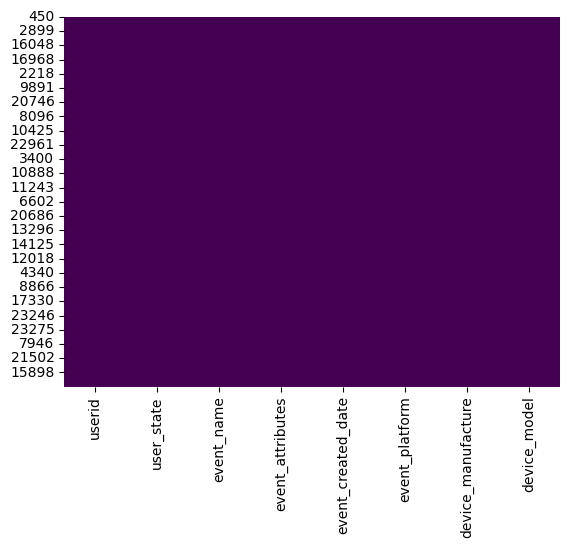

userid                0
user_state            0
event_name            0
event_attributes      0
event_created_date    0
event_platform        0
device_manufacture    0
device_model          0
dtype: int64


In [180]:
print("\033[4mNUMBER OF NULL VALUES PER COLUMN:\033[0m")

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.show()
print(df.isnull().sum())
cols_with_nan = df.columns[df.isna().any()].tolist()

### Lets take a loot at next column - `event_name`

In [181]:
values, labels  = df["event_name"].value_counts().agg({'index','values'})
event_name_dict = {value: label for value, label in zip(values,  labels)}

In [182]:
event_name_dict

{6116: 'Order',
 3269: 'Sign Up Success',
 1922: 'Add Vehicle Success',
 1609: 'Account History Transaction Details',
 1485: 'Chat Conversation Opened',
 1474: 'Wallet Opened',
 1202: 'Chat Conversation Started',
 1037: 'Add Payment Method Success',
 852: 'Email Confirmation Success',
 711: 'Subscription Premium',
 630: 'Calculator View',
 590: 'Sign Out',
 498: 'Account Setup Profile Skip',
 486: 'Add Vehicle Break',
 334: 'Add Payment Method Failed',
 310: 'Subscription Premium Renew',
 271: 'Subscription Premium Cancel',
 222: 'Account Setup Skip',
 120: 'Calculator Used',
 102: 'Transaction Refund',
 24: 'Sign Up Error',
 21: 'Add Vehicle Failed',
 1: 'Reset Password Set'}

#### Probably, `event_name` = "Chat Conversation Started" is a result of `event_name` = 'Chat Conversation Opened'

In [183]:
chat_opened_2_rows = list(df[df["event_name"] == 'Chat Conversation Opened'].index[:2])

In [184]:
chat_opened_2_rows

[19639, 19641]

In [185]:
df.loc[chat_opened_2_rows[0]]

userid                007b54670d72df309afd87befcbb63db
user_state                                          CA
event_name                    Chat Conversation Opened
event_attributes                  {"From":"Dashboard"}
event_created_date                 2022-04-05 22:02:42
event_platform                                     ios
device_manufacture                               Apple
device_model                                iPhone13,4
Name: 19639, dtype: object

In [186]:
df.loc[chat_opened_2_rows[0] + 2] # seems that one customer can open even 2 or more chats one after another.

userid                007b54670d72df309afd87befcbb63db
user_state                                          CA
event_name                    Chat Conversation Opened
event_attributes                  {"From":"Dashboard"}
event_created_date                 2022-04-05 22:15:26
event_platform                                     ios
device_manufacture                               Apple
device_model                                iPhone13,4
Name: 19641, dtype: object

In [187]:
df.loc[chat_opened_2_rows[0] + 3] # and now we have enent that "Chat Conversation Started".

userid                007b54670d72df309afd87befcbb63db
user_state                                          CA
event_name                   Chat Conversation Started
event_attributes                                    {}
event_created_date                 2022-04-05 22:15:55
event_platform                                     ios
device_manufacture                               Apple
device_model                                iPhone13,4
Name: 19642, dtype: object

In [188]:
# lets delete then rows with 'Chat Conversation Opened'
df = df[df.event_name != 'Chat Conversation Opened']

## Convert `event_attributes` values to dict

In [189]:
df["event_attributes"] = df.event_attributes.apply(lambda x: json.loads(x))

In [190]:
df[df.event_name == "Subscription Premium Cancel"]

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
8281,03e0c91e1163e8b80e74e586a3e666d6,MD,Subscription Premium Cancel,{},2022-02-24 19:45:02,ios,Apple,"iPhone12,1"
20026,051a5f8bce75a601be987980a09d4187,VA,Subscription Premium Cancel,{},2022-04-06 10:12:37,ios,Apple,"iPhone14,2"
14018,05630c0e889fe7371fc74d7ae01f491f,FL,Subscription Premium Cancel,{},2022-03-19 18:16:37,ios,Apple,"iPhone13,2"
3601,060153cf7a5844d9aed735d408b35f97,TX,Subscription Premium Cancel,{},2022-02-11 15:06:11,ios,Apple,"iPhone14,2"
21092,078ae59f1ae79df514e846e5e51eca8b,CA,Subscription Premium Cancel,{},2022-04-09 12:43:36,ios,Apple,"iPhone12,1"
...,...,...,...,...,...,...,...,...
19629,fc8e16ce7c98f58ba309cb7fc3cd1dec,TX,Subscription Premium Cancel,{},2022-04-05 21:09:25,ios,Apple,"iPhone10,5"
16943,fc9b74bab85fdc6cbdb5b965ca9f760f,CA,Subscription Premium Cancel,{},2022-03-28 13:08:43,ios,Apple,"iPhone12,1"
16944,fc9b74bab85fdc6cbdb5b965ca9f760f,CA,Subscription Premium Cancel,{},2022-03-28 13:08:43,ios,Apple,"iPhone12,1"
10814,fd5bc86aa11a1c4b1d17f1e78f50e4a5,FL,Subscription Premium Cancel,{},2022-03-05 19:09:39,android,samsung,SM-A515U


In [191]:
t = np.array(list(df.loc[450].event_attributes.values()))

In [192]:
np.delete(t, np.where(t == ""))

array(['Debit'], dtype='<U5')

In [193]:
def convert_to_list(x):
    if type(x) == dict:
        return np.delete(np.array(list(x.values())), np.where(np.array(list(x.values())) == ""))

In [194]:
# df.event_attributes = df.event_attributes.apply(convert_to_list)

In [195]:
df.event_created_date = pd.to_datetime(df.event_created_date)

In [196]:
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
450,0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,"{'Payment Method': 'Debit', 'Tokenized Pay': ''}",2022-01-19 18:47:45,android,samsung,SM-A716U
451,0006869712ec9841dc36234bce245203,MD,Subscription Premium,"{'Start Date': '2022-01-19', 'Renewal Date': '...",2022-01-19 18:48:01,android,samsung,SM-A716U
452,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{'Navigated From': 'Account History', 'Status'...",2022-01-19 18:48:08,android,samsung,SM-A716U
453,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{'Navigated From': 'Account History', 'Status'...",2022-01-19 18:48:44,android,samsung,SM-A716U
454,0006869712ec9841dc36234bce245203,MD,Add Vehicle Success,"{'Make': 'Chevrolet', 'Model': 'Express 3500',...",2022-01-19 18:50:34,android,samsung,SM-A716U


# ГОРИМ В ЧАСІ БЛЯХА

In [198]:
df = df.drop(columns=["event_attributes", "event_platform", "device_manufacture", "device_model"])

In [199]:
users_that_cancelled = df[df["event_name"] == 'Subscription Premium Cancel'].userid.unique()

In [202]:
df['cancelled_sub'] = np.where(df['userid'].isin(users_that_cancelled), True, False)

In [205]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 27.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00


In [206]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [208]:
df = df.drop(columns=["userid", "event_created_date"])

In [209]:
df

,user_state,event_name,cancelled_sub
450,MD,Add Payment Method Success,False
451,MD,Subscription Premium,False
452,MD,Account History Transaction Details,False
453,MD,Account History Transaction Details,False
454,MD,Add Vehicle Success,False
...,...,...,...
9874,PA,Sign Up Success,False
143,TX,Sign Up Success,False
1273,NY,Sign Up Success,False
1294,NY,Email Confirmation Success,False


In [211]:
df = pd.get_dummies(df)

In [213]:
X = df.copy()
y = X.pop("cancelled_sub")

In [216]:
model_xgb = XGBClassifier()

In [217]:
model_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<AxesSubplot: >

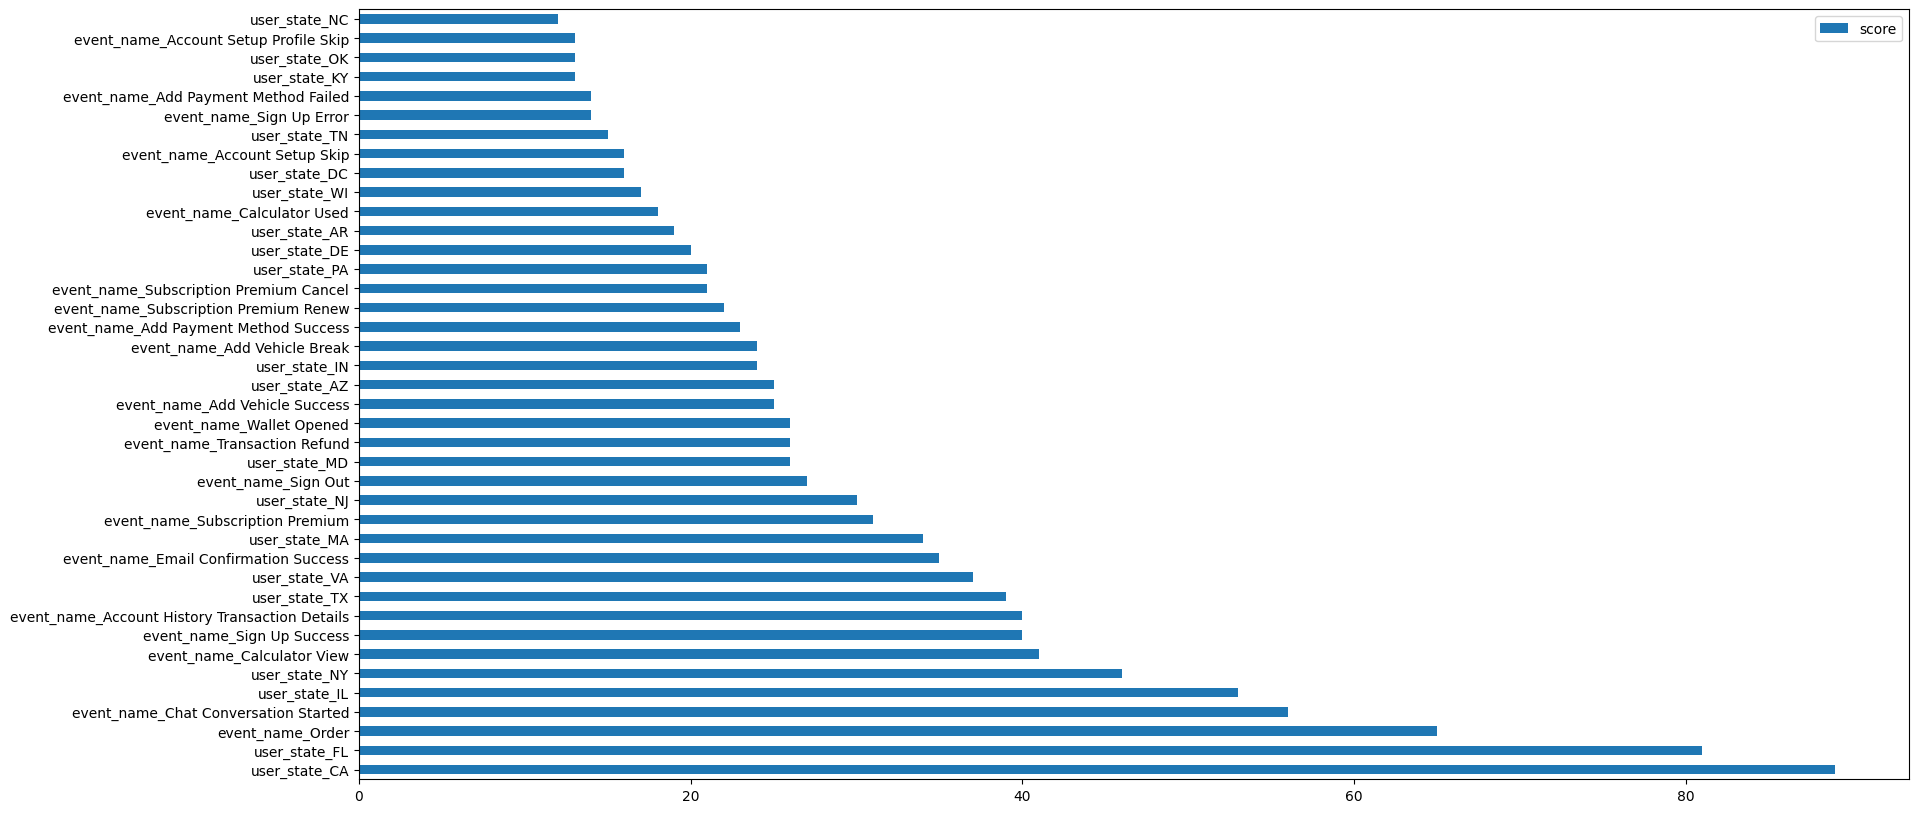

In [218]:
feature_important = model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features